<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando el Blog de  Hernán Casciari 


[Hernán Casciari](https://hernancasciari.com/#bio), es un escritor argentino, que escribe blog posts con cuentos e historias  relacionadas con el futbol, su vida, infancia, y relaciones familiares con toques de ficción. Este [blog](https://hernancasciari.com/blog/) es  tan interesantes que en 2005 fue premiado como “El mejor blog del mundo” por Deutsche Welle de Alemania. 

El objetivo de este caso-taller es construir un sistema de recomendación basado en los contenidos de los posts utilizando similitud de las palabras usadas o temas de los cuentos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran el archivo `blog_casciari.csv` con el título, la fecha de publicación, y el contenido de los cuentos publicados en el blog  de sr. Casciari. Cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.
   

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [120]:
# Utilice este espacio para escribir el código.
blog_casciari=pd.read_csv('data/blog_casciari.csv', sep=',')
print('Shape de la base: ',blog_casciari.shape)
blog_casciari.head()

Shape de la base:  (520, 3)


,titulo,fecha,cuento
0,El rincón blanco,1/11/08,De pronto yo estaba en el hogar donde pasé la ...
1,Mínimos avances en la cama,1/24/08,"Menos la cama, todo ha mejorado en este mundo...."
2,Don Marcos,2/19/08,"Dos veces, y no una, mi abuelo materno me ayud..."
3,Los dos rulfos,3/26/08,"A su regreso de México, mi amigo Comequechu no..."
4,La noticia no es el perro,4/15/08,"De repente, un video de You Tube recibe un mil..."


In [121]:
blog_casciari['cuento'][0]

'De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reconoció enseguida el olor inconfundible de la casa de la calle Treintaicinco. Siempre sabemos cuál es la fragancia del sitio donde crecimos; nadie acertaría a explicar de qué está compuesta, pero cada uno de nosotros es capaz de reconocer ese aroma entre miles. Y yo estaba ahora en mi casa de Mercedes. Exactamente en el sitio al que llamábamos el rincón blanco.\nEl rincón blanco siempre fue el epicentro de la casa. El lugar por el que había que pasar para ir a cualquier parte. No era un rincón, sino una prominencia amplia que abultaba el pasillo justo por la mitad. Y tampoco estaba pintada de blanco, pero le decíamos así. Nunca supimos por qué.\nEn todos los hogares hay recovecos y habitaciones que los mayores bautizan sin conciencia, y que luego nombran para siempre de una forma estrafalaria. Los hijos nacen y después crecen con la certidumbr

La base contiene 520 cuentos, dando el titulo, la fecha de publicacion y el cuento corto de Hernán Casciari. 


### 2. Homogenización de textos

Para cumplir con el objetivo de generar recomendaciones en esta sección debe preparar los posts para poder ser utilizados en su sistema de recomendación. Para ello, "limpie" y "tokenize" cada uno de los cuentos, describiendo detalladamente los pasos que realizo y si transformó o eliminó ciertas palabras. Para asistirlo en la tarea he creado listas de *stopwords* que están disponibles en la carpeta `data`. En su procedimiento ilustre la limpieza con el cuento 'La venganza del metegol'. (En su limpieza recuerde que el objetivo es generar recomendaciones a partir de la similitud de las palabras o temas de los cuentos)

In [122]:
# Utilice este espacio para escribir el código.
import re
import unidecode
import spacy


nlp = spacy.load("es_core_news_sm")


c:\Users\WD\.conda\envs\VSCEnv\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.7.0) was trained with spaCy v3.7.0 and may not be 100% compatible with the current version (3.8.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Agregar stopwords

In [123]:
#Stopwrods csv
stopwords = pd.read_csv('data/stopwords_taller.csv', header=None).values.flatten().tolist()
print('Shape de los stopwords: ',len(stopwords))

#Extra stopwords csv
extra_stopwords = pd.read_csv('data/extra_stopwords.csv', sep=',',header=None).values.flatten().tolist()
print('Shape de los extra_stopwords: ',len(extra_stopwords))

#Stopwords unicas en csv
stopwords_unicas = list(set(extra_stopwords) | set(stopwords))
print(stopwords_unicas)

#Agregar las stopwords al modelo
nlp.Defaults.stop_words |= set(stopwords_unicas)

Shape de los stopwords:  169
Shape de los extra_stopwords:  313
['todo', 'estas', 'tú', 'es', 'ellas', 'tenía', 'vida', 'sido', 'českomoravský', 'estar', 'una', 'seré', 'ser', 'estabas', 'mi', 'alguien', 'tendríais', 'está', 'éstas', 'diez', 'tengas', 'bien', 'basdala', 'tenías', 'fuisteis', 'andrés', 'has', 'estuviéramos', 'tiempo', 'qué', 'sakhan', 'otras', 'hubieses', 'medio', 'un', 'año', 'serás', 'habríamos', 'eras', 'tendrían', 'gordo', 'estaremos', 'estuvieron', 'tuvieron', 'hasta', 'pues', 'celoni', 'šeredova', 'gelós', 'estarás', 'hayáis', 'ellos', 'seáis', 'haya', 'nuestras', 'tetas', 'sin', 'suyos', 'vosostros', 'otro', 'mío', 'habido', 'estarán', 've', 'estaban', 'son', 'tuve', 'hace', 'iveta', 'estás', 'nunca', 'quiero', 'nada', 'fuera', 'toda', 'hernán', 'ésas', 'puede', 'seamos', 'tenéis', 'cuando', 'ése', 'mañana', 'hube', 'fueran', 'sería', 'casi', 'noche', 'me', 'cinco', 'para', 'seis', 'ver', 'quizá', 'canoso', 'tener', 'hemos', 'mundo', 'lucas', 'narcís', 'que', 'es

In [124]:
from nltk.stem.snowball import SpanishStemmer

stemmer = SpanishStemmer()

def text_cleaning(txt, apply_lemma=True, apply_stemming=True): # eliminar caracteres especiales 
    # Eliminar caracteres especiales
    out = unidecode.unidecode(txt) # tildes y virgulilla - nlp default.stopwords "las" incluye e.g. año no la limpiaria
    out = re.sub('[^A-Za-z0-9 ]+', ' ',out)
    out = re.sub("[^\\w\\s]|\n", ' ', out) # simbolos de puntuacion y retornos con esapcios
    out = re.sub("\d+", "", out) # numeros por espacios vacios
    out = re.sub('\s+', ' ', out) # remueve espacios extra
    out = out.lower() # Poner en minúsculas
    #NLP object
    out = nlp(out)
    # Eliminar Stopwords
    out = [token.text for token in out if not token.is_stop]
    out = " ".join(out)
    
    # Obtener los lemas de cada palabra
    if apply_lemma== True:
    
        lemmas =[token.lemma_ for token in nlp(out)]
   
    # Apply stemming
    if apply_stemming== True:
    
        lemmas = [stemmer.stem(lemma) for lemma in lemmas]
    
   
    # Convertir la lista de lemmas nuevamente a texto
    out = " ".join(lemmas)
    # Remover palabras muy cortas
    out = [token.text for token in nlp(out) if len(token) > 2]
    
    return out

In [125]:
blog_casciari['cuento_limpio']=blog_casciari['cuento'].apply(text_cleaning)
blog_casciari.head()

,titulo,fecha,cuento,cuento_limpio
0,El rincón blanco,1/11/08,De pronto yo estaba en el hogar donde pasé la ...,"[hog, infanci, sab, nariz, acostumbr, penumbr,..."
1,Mínimos avances en la cama,1/24/08,"Menos la cama, todo ha mejorado en este mundo....","[cam, mejor, cocinab, sop, fueg, len, met, taz..."
2,Don Marcos,2/19/08,"Dos veces, y no una, mi abuelo materno me ayud...","[abuel, matern, ayud, escritor, intencion, con..."
3,Los dos rulfos,3/26/08,"A su regreso de México, mi amigo Comequechu no...","[regres, mexic, amig, cont, histori, pas, muj,..."
4,La noticia no es el perro,4/15/08,"De repente, un video de You Tube recibe un mil...","[vide, you, tub, recib, millon, visit, autor, ..."


In [126]:
venganza_metegol_idx = blog_casciari[blog_casciari['titulo'] == 'La venganza del metegol'].index
venganza_metegol = blog_casciari.loc[venganza_metegol_idx,'cuento']
venganza_metegol_limpio = blog_casciari.loc[venganza_metegol_idx,'cuento_limpio']
print('Venganza del metegol original: ',venganza_metegol)

print('Venganza del metegol limpiado: ',venganza_metegol_limpio)


Venganza del metegol original:  160    El mes pasado me invitaron a presentar un libr...
Name: cuento, dtype: object
Venganza del metegol limpiado:  160    [mes, invit, present, air, futbol, charl, dire...
Name: cuento_limpio, dtype: object


In [127]:
clean=list(blog_casciari['cuento_limpio'])

clean[160][:20]

['mes',
 'invit',
 'present',
 'air',
 'futbol',
 'charl',
 'director',
 'editorial',
 'invit',
 'jug',
 'part',
 'metegol',
 'invent',
 'espanol',
 'creador',
 'llam',
 'erron',
 'futbolin',
 'ano',
 'jug']

Se hizo una función llamada text_cleaning para procesar y limpiar textos en español. Primero, se importó SpanishStemmer de la librería nltk.stem.snowball y se creó una instancia llamada stemmer para el stemming.

La función text_cleaning acepta un texto txt y dos parámetros opcionales: apply_lemma y apply_stemming, que se establecen en True por defecto en caso de no querer usar Stemming o Lemmatizacion.

Para limpiar el texto, se usó unidecode para normalizar caracteres acentuados y especiales. Luego, se aplicaron expresiones regulares para eliminar caracteres no alfanuméricos, puntuación, y números, sustituyéndolos por espacios vacíos. También se eliminaron los espacios adicionales y se convirtió el texto a minúsculas.

El texto limpio se pasó a un objeto de procesamiento NLP (nlp) para eliminar las palabras vacías (stopwords). Si apply_lemma es True, se obtuvieron los lemas de las palabras. Si apply_stemming es True, se aplicó el stemming a estos lemas.

Después, los lemas (o las palabras después del stemming) se unieron nuevamente en una cadena de texto. Finalmente, se eliminaron las palabras que tienen 2 caracteres o menos.

La función devuelve una lista de palabras que han pasado por estos pasos de limpieza y procesamiento.

Finalmente se pueden ver las primeras 20 palabras corregidas con todo lo aplicado anteriormente

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones de cuentos en el blog a un usuario que leyó 'La venganza del metegol'. Para ello vamos a utilizar distintas estrategias.

#### 3.1. Recomendaciones basadas en contenidos

##### 3.1.1. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando en la distancia de coseno donde el texto este vectorizado por `CountVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones.

In [128]:
# Utilice este espacio para escribir el código.
from sklearn.feature_extraction.text import CountVectorizer

clean_sentences= [" ".join(i) for i in clean]

type(clean_sentences)

list

In [129]:
#Definimos un objeto CountVectorizer y creamos los vectores
count = CountVectorizer()
count_matrix = count.fit_transform(clean_sentences)
count_matrix

<520x15839 sparse matrix of type '<class 'numpy.int64'>'
	with 118579 stored elements in Compressed Sparse Row format>

In [130]:
# Convertir la matriz dispersa a un DataFramem con el el vocabulario (palabras) que el CountVectorizer está utilizando
df_count_matrix = pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names_out())

# Ver las primeras filas del  DataFrame resultante con la matriz count y las palabras del vocabulario
df_count_matrix.head()

,aam,abaca,abaj,abalanz,aban,abanan,abandon,abaraj,abarat,abarc,...,zulu,zumb,zumbadis,zumr,zurd,zurdaz,zurdit,zurr,zurrar,zurrart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la matriz de similitud de coseno
cosine_sim_count = cosine_similarity(count_matrix, count_matrix)
cosine_sim_count

array([[1.        , 0.13724015, 0.29612535, ..., 0.09438183, 0.14546239,
        0.2222022 ],
       [0.13724015, 1.        , 0.21694738, ..., 0.18498376, 0.12227083,
        0.19201176],
       [0.29612535, 0.21694738, 1.        , ..., 0.15281542, 0.16559723,
        0.28858218],
       ...,
       [0.09438183, 0.18498376, 0.15281542, ..., 1.        , 0.12347278,
        0.08962509],
       [0.14546239, 0.12227083, 0.16559723, ..., 0.12347278, 1.        ,
        0.21242625],
       [0.2222022 , 0.19201176, 0.28858218, ..., 0.08962509, 0.21242625,
        1.        ]])

In [172]:
def recomendador_coseno(title, cosine_sim, df=blog_casciari):
    # Crear una Serie que contiene como índice el título del cuento y el valor correspondiente al índice
    indices = pd.Series(df.index, index=df['titulo'])
    
    # Obtener el índice del cuento a partir del título
    idx = indices[title] 
    print('Indice: ', idx)
    print('Titulo: ', title)

    # Obtener la similitud de coseno para ese cuento en particular con todos los cuentos
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar la lista de tuplas por la similitud de coseno en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener los 5 cuentos más similares ignorando el primero (que es el mismo cuento)
    sim_scores = sim_scores[1:6]

    # Obtener los índices y las similitudes
    cuento_indices = [i[0] for i in sim_scores]
    sim_scores_values = [i[1] for i in sim_scores]

    # Crear un DataFrame para mostrar los resultados
    result_df = pd.DataFrame({
        'Índice': cuento_indices,
        'Título': df['titulo'].iloc[cuento_indices].values,
        'Similitud Coseno': sim_scores_values
    })

    # Imprimir los cuentos recomendados con sus índices y similitudes
    print('\nCuentos recomendados:')
    #print(result_df)
    cuento_principal = df[df['titulo'] == title]['cuento'].values[0]

    # Retornar el DataFrame con los resultados
    return result_df

In [171]:
# Recomendacion con lematizacion y stemming
recomendador_coseno('La venganza del metegol', cosine_sim_count)

Indice:  160
Titulo:  La venganza del metegol

Cuentos recomendados:


,Índice,Título,Similitud Coseno
0,17,Cuento con bruja y tramontina,0.329029
1,416,Hace seis años también era domingo,0.306990
2,5,El milagro de los pueblos,0.306666
3,121,Gaussian blur,0.300123
4,389,Una línea de puntos en un libro de catecismo,0.293747


In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def generar_nube_palabras(titulos, df=blog_casciari):
    """
    Genera y muestra una nube de palabras para una lista de títulos de cuentos.
    
    :param titulos: Lista de títulos de cuentos para los cuales se generará la nube de palabras.
    :param df: DataFrame que contiene los cuentos.
    """
    # Filtrar los cuentos que tienen los títulos en la lista proporcionada
    cuentos_filtrados = df[df['titulo'].isin(titulos)]

    # Unir las listas de palabras de los cuentos filtrados en una sola lista
    palabras_combined = [palabra for sublist in cuentos_filtrados['cuento_limpio'] for palabra in sublist]
    
    # Unir todas las palabras en un solo texto
    texto_combined = " ".join(palabras_combined)

    # Armamos la nube de palabras
    wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(texto_combined)

    # Mostrar la nube de palabras
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


Podemos ver las palabras mas repetidas en los 5 titulos mas recomendados con `Count Vectorizer`:

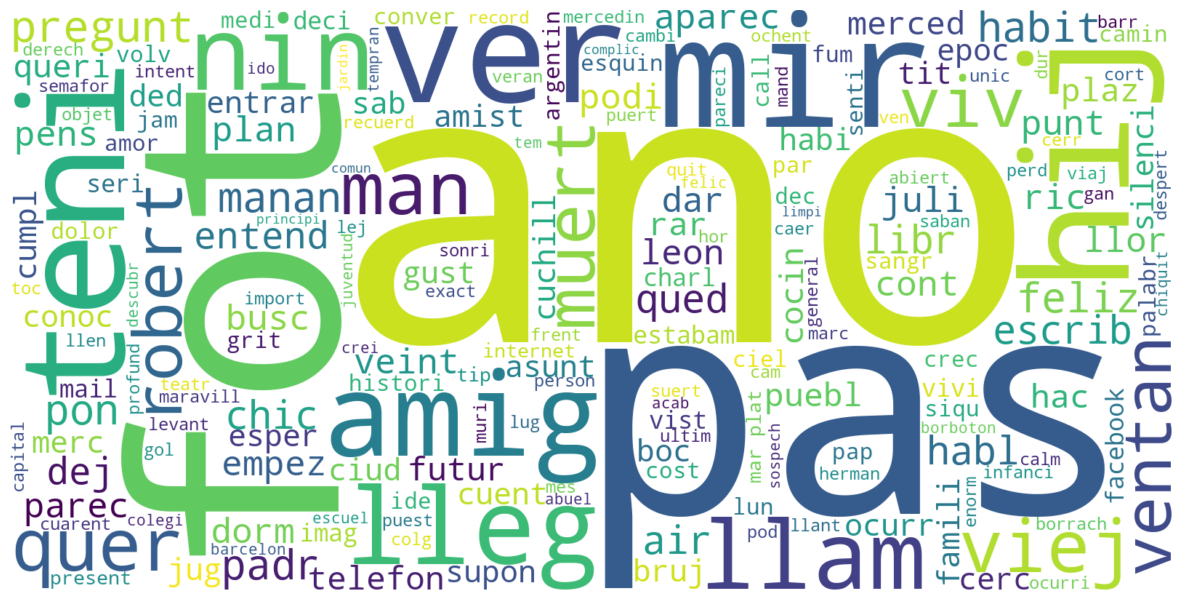

In [184]:
lista_recomendadas_count=[
    "Cuento con bruja y tramontina",
    "Hace seis años también era domingo",
    "El milagro de los pueblos",
    "Gaussian blur",
    "Una línea de puntos en un libro de catecismo"
]

generar_nube_palabras(lista_recomendadas_count)

El procedimiento realizado fue tomar primero la matriz de de count vectorizer para las palabras en todos los cuentos. De esta forma se hace un conteo de cuantas veces aparece cada palaabra en cada cuento, se ve que hay un monton de columnas, esto se debe a que se tienen todas las palabras posibles en todos los cuentos y cada fila es cada cuento, y el valor que aparece en la matriz es el conteo de veces que aparece esa palabra. Despues de esto se llama a la funcion `recomendador_coseno`, lo que hace esta funcion es:

1. **Crear una Serie de Índices**:
   - Se crea una Serie de Pandas que mapea los títulos de los cuentos a sus respectivos índices en el DataFrame. Esto permite buscar rápidamente el índice de un cuento dado su título.

2. **Obtener el Índice del Cuento**:
   - Se obtiene el índice del cuento para el cual se desean encontrar recomendaciones usando el título proporcionado. Se imprime el índice y el título del cuento principal para referencia.

3. **Calcular la Similitud de Coseno**:
   - Se calcula la similitud de coseno entre el cuento seleccionado y todos los otros cuentos. La similitud de coseno es una medida que indica qué tan similares son dos textos. Esta similitud se utiliza para comparar el cuento principal con todos los demás.

4. **Ordenar las Similitudes**:
   - Se organiza la lista de resultados de similitud en orden descendente, es decir, de más similar a menos similar. Esto se hace para identificar los cuentos más parecidos al cuento principal.

5. **Seleccionar las Mejores Recomendaciones**:
   - Se seleccionan los cinco cuentos más similares, excluyendo el primer resultado que siempre será el cuento mismo (ya que la similitud con sí mismo es la máxima posible).

6. **Crear un DataFrame de Resultados**:
   - Se crea un DataFrame que muestra los índices, títulos y valores de similitud de los cinco cuentos más similares. Esto organiza la información de manera clara y estructurada para facilitar su visualización.

7. **Imprimir los Resultados**:
   - Se imprime el DataFrame con los cuentos recomendados, sus índices y sus puntuaciones de similitud.

8. **Devolver los Resultados**:
   - Finalmente, la función devuelve el DataFrame con los resultados, permitiendo que el usuario vea cuáles son los cuentos más recomendados basados en la similitud de coseno con el cuento principal.



Se recomienda entonces los siguientes titulos gracias a la ordenacion con la similitud del coseno, entre mayor similitud entre palabras usadas mayor el valor de similitud de coseno:

##### `Count Vectorizer`

| **Índice** | **Título**                                          | **Similitud Coseno** |
|--------|----------------------------------------------------|------------------|
| 17     | Cuento con bruja y tramontina                     | 0.329029         |
| 416    | Hace seis años también era domingo                | 0.306990         |
| 5      | El milagro de los pueblos                         | 0.306666         |
| 121    | Gaussian blur                                     | 0.300123         |
| 389    | Una línea de puntos en un libro de catecismo      | 0.293747         |

Convierte el texto en una matriz de términos donde cada entrada representa la frecuencia de aparición de una palabra en un documento específico.

- **Características**:
    - *Simplicidad*: Solo cuenta el número de veces que aparece cada palabra.
    - *Ponderación*: No ajusta la importancia de las palabras en función de su frecuencia en el corpus completo como lo hace TF-IDF.

- **Desventajas**:
    - *No Considera la Frecuencia Inversa de Documentos*: Palabras que aparecen frecuentemente en todos los documentos (como "el", "la", "de") tienen la misma importancia que palabras que aparecen pocas veces. Esto puede sesgar los resultados hacia términos muy comunes y poco informativos.
    - *Menos Capacidad para Capturar Importancia Relativa*: No distingue entre términos comunes y términos importantes en el contexto del corpus global.


##### 3.1.2. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para  el cuento 'La venganza del metegol' usando nuevamente la distancia de coseno, pero ahora vectorice el texto usando `TF-IDFVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados del punto anterior y explique sus similitudes y/o diferencias.

In [156]:
# Utilice este espacio para escribir el código.
from sklearn.feature_extraction.text import TfidfVectorizer

#Definimos el objeto TF-IDF Vectorizer Object
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(clean_sentences)

#Dimensiones de la matriz
print('Shape de la matriz: ',tfidf_matrix.shape)

Shape de la matriz:  (520, 15839)


In [158]:
df_TFIDF_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=count.get_feature_names_out())

# Ver las primeras filas del  DataFrame resultante con la matriz TF-IDF y las palabras del vocabulario
df_TFIDF_matrix.head()

,aam,abaca,abaj,abalanz,aban,abanan,abandon,abaraj,abarat,abarc,...,zulu,zumb,zumbadis,zumr,zurd,zurdaz,zurdit,zurr,zurrar,zurrart
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.024926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.018205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
#Calculamos la matriz de similitud de coseno para el TF-IDF
cosine_sim_TFIDF = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_TFIDF

array([[1.        , 0.07697194, 0.17483406, ..., 0.04837824, 0.07150584,
        0.11075772],
       [0.07697194, 1.        , 0.12641887, ..., 0.07858555, 0.04862414,
        0.08355205],
       [0.17483406, 0.12641887, 1.        , ..., 0.07374417, 0.08736917,
        0.14473985],
       ...,
       [0.04837824, 0.07858555, 0.07374417, ..., 1.        , 0.05180129,
        0.04231529],
       [0.07150584, 0.04862414, 0.08736917, ..., 0.05180129, 1.        ,
        0.08985691],
       [0.11075772, 0.08355205, 0.14473985, ..., 0.04231529, 0.08985691,
        1.        ]])

In [164]:
recomendador_coseno('La venganza del metegol', cosine_sim_TFIDF)

Indice:  160
Titulo:  La venganza del metegol

Cuentos recomendados:


,Índice,Título,Similitud Coseno
0,17,Cuento con bruja y tramontina,0.129461
1,138,Nueve libros que me hicieron olvidar el Mundial,0.113933
2,121,Gaussian blur,0.108542
3,5,El milagro de los pueblos,0.107927
4,389,Una línea de puntos en un libro de catecismo,0.103544


El procedimiento realizado fue hacer lo hecho anteriormente con la similitud de coseno, pero en este caso la matriz creada se hace no con un count vectorizer, o un conteo de aparicion de la palabra sino una ponderación para cada término en el texto. Despues de esto se calcula la similitud de coseno de esta matriz y se procede a usar el mismo codigo creado anteriormente para realizar la recomendacion poniendo los 5 valores con mayor similitud de coseno.


Podemos comparar entonces los resultados obtenidos:

##### `Count Vectorizer`

| **Índice** | **Título**                                          | **Similitud Coseno** |
|--------|----------------------------------------------------|------------------|
| 17     | Cuento con bruja y tramontina                     | 0.329029         |
| 416    | Hace seis años también era domingo                | 0.306990         |
| 5      | El milagro de los pueblos                         | 0.306666         |
| 121    | Gaussian blur                                     | 0.300123         |
| 389    | Una línea de puntos en un libro de catecismo      | 0.293747         |

Convierte el texto en una matriz de términos donde cada entrada representa la frecuencia de aparición de una palabra en un documento específico.

- **Características**:
    - *Simplicidad*: Solo cuenta el número de veces que aparece cada palabra.
    - *Ponderación*: No ajusta la importancia de las palabras en función de su frecuencia en el corpus completo como lo hace TF-IDF.

- **Desventajas**:
    - *No Considera la Frecuencia Inversa de Documentos*: Palabras que aparecen frecuentemente en todos los documentos (como "el", "la", "de") tienen la misma importancia que palabras que aparecen pocas veces. Esto puede sesgar los resultados hacia términos muy comunes y poco informativos.
    - *Menos Capacidad para Capturar Importancia Relativa*: No distingue entre términos comunes y términos importantes en el contexto del corpus global.



Se recomienda entonces los siguientes titulos gracias a la ordenacion con la similitud del coseno en este caso con TF-IDF, entre mayor similitud entre palabras usadas mayor el valor de similitud de coseno:

##### `TF-IDF Vectorizer`

| Índice | Título                                             | Similitud Coseno |
|--------|----------------------------------------------------|------------------|
| 17     | Cuento con bruja y tramontina                     | 0.129461         |
| 138    | Nueve libros que me hicieron olvidar el Mundial  | 0.113933         |
| 121    | Gaussian blur                                     | 0.108542         |
| 5      | El milagro de los pueblos                         | 0.107927         |
| 389    | Una línea de puntos en un libro de catecismo      | 0.103544         |


Calcula una ponderación para cada término en un documento en función de su frecuencia en ese documento (TF) y su frecuencia inversa en el corpus completo (IDF). La fórmula es:

$$TF-IDF= TF \times IDF$$


- **TF** (Term Frequency): Frecuencia de una palabra en un documento.

- **IDF** (Inverse Document Frequency): Logaritmo inverso de la frecuencia de documentos que contienen la palabra.

- **Características**:

    - *Ponderación*: Ajusta la importancia de las palabras según su frecuencia en el texto.
    
    - *Más Precisión*: Da más peso a las palabras que son raras en el corpus y menos peso a las palabras comunes, ayudando a captar términos significativos que pueden ser más relevantes para la similitud.
- **Ventajas**:

    - *Filtra Palabras Comunes*: Las palabras que aparecen en muchos documentos obtienen un peso menor, mientras que las palabras que son raras obtienen un peso mayor. Esto ayuda a que los documentos sean más representativos de sus contenidos únicos.

    - *Mejor Distinción*: Puede distinguir mejor entre documentos que son semánticamente similares en función de términos significativos.



#### Comparación en Resultados de Recomendación

**Sensibilidad a Palabras Comunes**:

- *CountVectorizer* puede resultar en recomendaciones que favorezcan documentos con palabras comunes que aparecen en muchos textos, lo que puede sesgar las recomendaciones hacia documentos menos relevantes.

- *TF-IDFVectorizer* da menos peso a las palabras comunes y más peso a las palabras que son más distintivas, proporcionando recomendaciones más centradas en la semántica del contenido.


Vemos que los cuentos que se repiten son: *Cuento con bruja y tramontina*, *El milagro de los pueblos*, *Gaussian blur*    y  *Una línea de puntos en un libro de catecismo*.

Los que no se juntan entre ambas vectorizaciones son *Nueve libros que me hicieron olvidar el Mundial* que solo recomienda en TF-IDF y *Hace seis años también era domingo* que solo recomienda con Count Vectorizer.


En resumen, TF-IDFVectorizer suele proporcionar resultados de recomendación más precisos y relevantes al ajustar la importancia de los términos según su frecuencia en el documento y en el texto global. Esto ayuda a evitar la sobreponderación de palabras comunes y mejora la capacidad de capturar similitudes semánticas más sutiles entre documentos. CountVectorizer, al no considerar la frecuencia inversa de documentos, puede sesgar las recomendaciones hacia términos que aparecen con frecuencia en muchos documentos, resultando en recomendaciones que pueden ser menos relevantes.


Sin embargo, como vemos que la diferencia es solamente en un cuento por vectorizador, podriamos decir que hay bastante confianza en que los otros 4 sean muy buenas recomendaciones para alguien que leyo *La venganza del metegol*.

##### 3.1.3. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando el texto vectorizado por `TF-IDFVectorizer` y la correlación como medida de similitud. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados de los puntos anteriores y explique sus similitudes y/o diferencias.

In [187]:
from scipy.spatial.distance import correlation

# Utilice este espacio para escribir el código.
def recomendador_correlacion(title, tfidf_matrix, df=blog_casciari):
    # Crear una Serie que contiene como índice el título del cuento y el valor correspondiente al índice
    indices = pd.Series(df.index, index=df['titulo'])
    
    # Obtener el índice del cuento a partir del título
    idx = indices[title] 
    print('Indice: ', idx)
    print('Titulo: ', title)

    # Obtener el vector TF-IDF del cuento objetivo
    target_vector = tfidf_matrix[idx].toarray().flatten()

    # Calcular la correlación entre el vector del cuento objetivo y todos los vectores
    correlations = []
    for i in range(tfidf_matrix.shape[0]):
        if i != idx:
            vector = tfidf_matrix[i].toarray().flatten()
            # Correlación = 1 - distancia para convertir distancia en correlación
            corr = 1 - correlation(target_vector, vector)
            correlations.append((i, corr))
    
    # Ordenar la lista de tuplas por la correlación en orden descendente
    correlations = sorted(correlations, key=lambda x: x[1], reverse=True)

    # Obtener los 5 cuentos más similares ignorando el primero (que es el mismo cuento)
    correlations = correlations[1:6]

    # Obtener los índices y las correlaciones
    cuento_indices = [i[0] for i in correlations]
    correlation_values = [i[1] for i in correlations]

    # Crear un DataFrame para mostrar los resultados
    result_df = pd.DataFrame({
        'Índice': cuento_indices,
        'Título': df['titulo'].iloc[cuento_indices].values,
        'Correlación': correlation_values
    })

    # Imprimir los cuentos recomendados con sus índices y correlaciones
    print('\nCuentos recomendados:')
    
    
    # Retornar el DataFrame con los resultados
    return result_df

In [188]:
recomendador_correlacion('La venganza del metegol', tfidf_matrix)

Indice:  160
Titulo:  La venganza del metegol

Cuentos recomendados:


,Índice,Título,Correlación
0,138,Nueve libros que me hicieron olvidar el Mundial,0.102465
1,5,El milagro de los pueblos,0.098543
2,121,Gaussian blur,0.097612
3,389,Una línea de puntos en un libro de catecismo,0.095761
4,12,Abrir y cerrar un círculo,0.091585


Para hacer recomenmdacion en este caso con TF-IDF Vectorizer pero usando una nueva medida de similitud, en este caso la correlacion y ordenar con este valor calculado. Partimos entonces de la misma matriz de TF-IDF definida antes y se usa la nueva funcion `recomendador_correlacion`:

1. **Definir la Función**:
   - La función `recomendador_correlacion` toma tres parámetros:
     - `title`: el título del cuento de interés.
     - `tfidf_matrix`: la matriz TF-IDF que representa los textos de los cuentos.
     - `df`: el DataFrame que contiene los datos de los cuentos.

2. **Crear una Serie de Índices**:
   - Se crea una Serie de Pandas que mapea los títulos de los cuentos a sus índices en el DataFrame. Esto facilita la búsqueda del índice basado en el título del cuento.

3. **Obtener el Índice del Cuento**:
   - Usando el título del cuento proporcionado, se obtiene el índice del cuento en la matriz TF-IDF. Este índice y el título del cuento se imprimen para referencia.

4. **Obtener el Vector TF-IDF del Cuento de Interés**:
   - Se extrae el vector TF-IDF del cuento seleccionado utilizando el índice obtenido. El vector se convierte a un array plano para simplificar el cálculo de la correlación.

5. **Calcular la Correlación con Otros Cuentos**:
   - Se inicializa una lista para almacenar los resultados de la correlación. Para cada cuento en la matriz TF-IDF, se calcula la correlación entre su vector y el vector del cuento de interés.
   - La correlación se calcula como `1 - distancia`, convirtiendo la distancia en una medida de similitud, donde un valor de 1 indica máxima similitud.

6. **Ordenar los Resultados por Correlación**:
   - La lista de correlaciones se ordena en orden descendente basado en el valor de correlación. Esto asegura que los cuentos más similares aparezcan al principio de la lista.

7. **Seleccionar las Mejores Recomendaciones**:
   - Se seleccionan los 5 cuentos más similares, excluyendo el primero en la lista que siempre será el cuento de interés (es decir, su propia correlación es máxima y no se desea en las recomendaciones).

8. **Crear un DataFrame de Resultados**:
   - Se construye un DataFrame que contiene los índices de los cuentos recomendados, sus títulos y los valores de correlación. Este DataFrame organiza los resultados de manera clara.

9. **Devolver los Resultados**:
    - La función retorna el DataFrame con los resultados recomendados, permitiendo que el usuario vea las recomendaciones en un formato estructurado.





### `Similitud de Coseno`

##### `Count Vectorizer`

| **Índice** | **Título**                                          | **Similitud Coseno** |
|--------|----------------------------------------------------|------------------|
| 17     | Cuento con bruja y tramontina                     | 0.329029         |
| 416    | Hace seis años también era domingo                | 0.306990         |
| 5      | El milagro de los pueblos                         | 0.306666         |
| 121    | Gaussian blur                                     | 0.300123         |
| 389    | Una línea de puntos en un libro de catecismo      | 0.293747         |


##### `TF-IDF Vectorizer`

| Índice | Título                                             | Similitud Coseno |
|--------|----------------------------------------------------|------------------|
| 17     | Cuento con bruja y tramontina                     | 0.129461         |
| 138    | Nueve libros que me hicieron olvidar el Mundial  | 0.113933         |
| 121    | Gaussian blur                                     | 0.108542         |
| 5      | El milagro de los pueblos                         | 0.107927         |
| 389    | Una línea de puntos en un libro de catecismo      | 0.103544         |

**Características:**
- *Normalización*: La similitud de coseno normaliza los vectores, lo que significa que solo se considera la dirección del vector, no su longitud.
- *Aplicación*: Es muy utilizada en procesamiento de lenguaje natural y recuperación de información para comparar documentos o textos, ya que es robusta frente a diferencias en la longitud de los textos.


### `Correlacion`

| Índice | Título                                           | Correlación |
|--------|--------------------------------------------------|-------------|
| 0      | Nueve libros que me hicieron olvidar el Mundial | 0.102465    |
| 1      | El milagro de los pueblos                        | 0.098543    |
| 2      | Gaussian blur                                    | 0.097612    |
| 3      | Una línea de puntos en un libro de catecismo     | 0.095761    |
| 4      | Abrir y cerrar un círculo                        | 0.091585    |


- **Características**
   - *Dependencia de Escala*: La correlación no es sensible a la escala absoluta, lo que significa que las diferencias en la magnitud de los vectores no afectan la medida de similitud.
Aplicación: Puede ser más adecuada para encontrar relaciones lineales en datos, y se usa menos frecuentemente en procesamiento de texto comparado con la similitud de coseno.

- **Similitudes**
   - *Medida de Similitud*: Ambos métodos se utilizan para medir la similitud entre vectores. En ambos casos, un valor más alto indica una mayor similitud entre los vectores comparados.
Independencia de Magnitud: Ambas métricas son insensibles a la magnitud total de los vectores, ya que están diseñadas para evaluar solo las características o la dirección de los vectores en el espacio.


### **Diferencias**
- **Enfoque**:

   - *Similitud de Coseno*: Se enfoca en el ángulo entre los vectores, lo que proporciona una medida de la orientación relativa, independientemente de la magnitud de los vectores.
   - *Correlación*: Se enfoca en cómo los vectores cambian conjuntamente, lo que refleja la relación lineal entre las características de los vectores.

- **Rango de Valores**:

   - *Similitud de Coseno*: Normalmente da valores entre 0 y 1.
   - *Correlación*: Da valores entre -1 y 1, proporcionando una medida de la fuerza y dirección de una relación lineal.

- **Uso en Procesamiento de Texto**:

- *Similitud de Coseno*: Es ampliamente utilizada para comparar textos y documentos en NLP y recuperación de información.
- *Correlación*: Aunque útil en muchos contextos estadísticos y de análisis de datos, no es tan comúnmente usada para la comparación de textos como la similitud de coseno.



##### 3.2. Recomendaciones basadas en temas

Usando modelado de temas con LDA, encuentre los temas subyacentes en el blog. Explique como eligió el numero óptimo de temas. Utilizando el tema asignado al cuento 'La venganza del metegol' y la probabilidad de pertenecer a este tema genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para este cuento. Explique el procedimiento que realizó. Compare con los resultados encontrados anteriormente y explique sus similitudes y/o diferencias. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 4 Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para la entrada elegida? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir su procedimiento)